<a href="https://colab.research.google.com/github/karkakol/PSI_PROJECT/blob/main/PSI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]



In [ ]:
data = pd.read_csv(r'/content/student-alcohol-consumption.csv', index_col=False)
data.head()



,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,NaN,T,1,1,1,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,NaN,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [ ]:
data.dropna(inplace=True)

data.reset_index(drop=True, inplace=True)

data.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
2,4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours
3,6,GP,M,16,LE3,T,2,2,1,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,Urban,2 to 5 hours
4,7,GP,F,17,GT3,A,4,4,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,Urban,2 to 5 hours


In [ ]:
data.columns


Index(['Unnamed: 0', 'school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'location', 'study_time'],
      dtype='object')

In [ ]:
data.shape


(392, 30)

In [ ]:
from collections import Counter
value_counts = Counter(data['romantic'])


for value, count in value_counts.items():
    print(f"{value}: {count}")

no: 263
yes: 132


In [ ]:
SEARCHED_NAME = 'romantic'
for column_name in data.columns:
  print('{}\n'.format(column_name))
  print(data[column_name].unique(), '\n')

Unnamed: 0

[  0   2   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 24

In [ ]:
num_columns = ['age','Medu','Fedu', 'traveltime', 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
cat_columns = [column for column in data.columns if column not in num_columns and column not in ['Unnamed: 0',SEARCHED_NAME] ]
print(num_columns)
print(cat_columns)

['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
['school', 'sex', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'location', 'study_time']


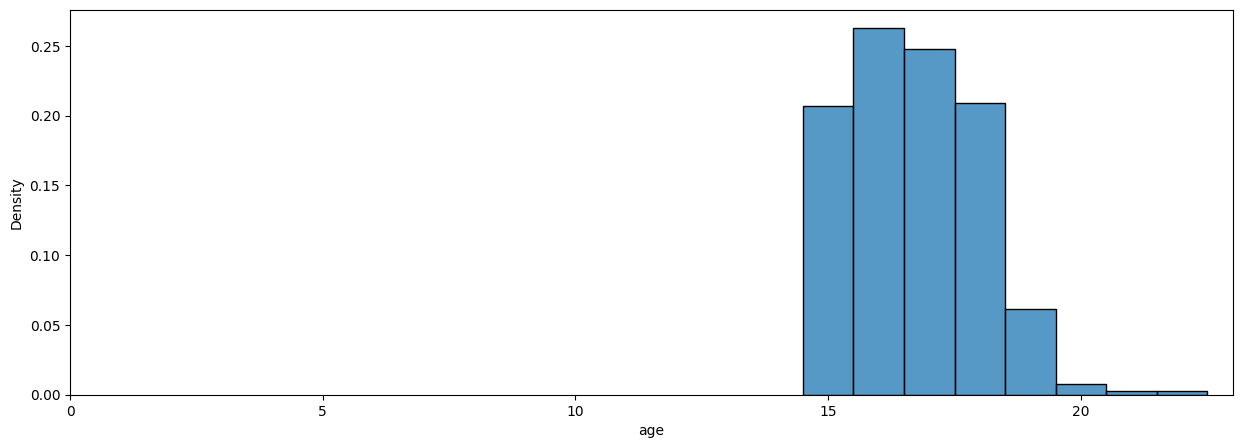

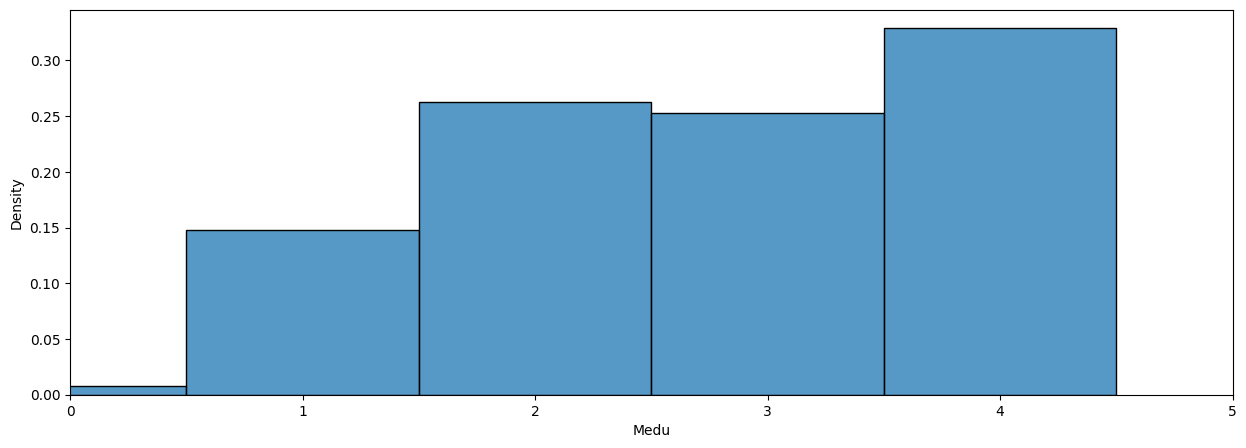

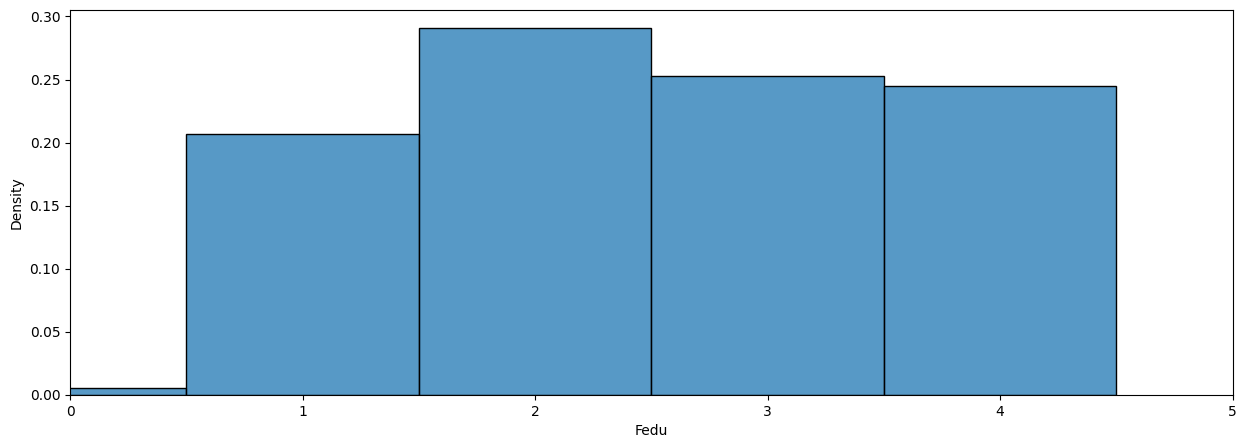

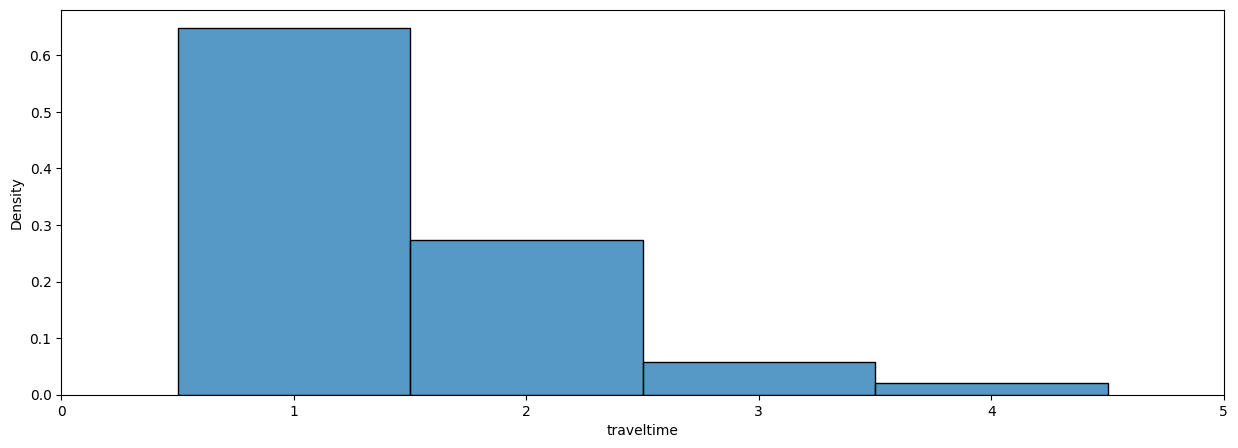

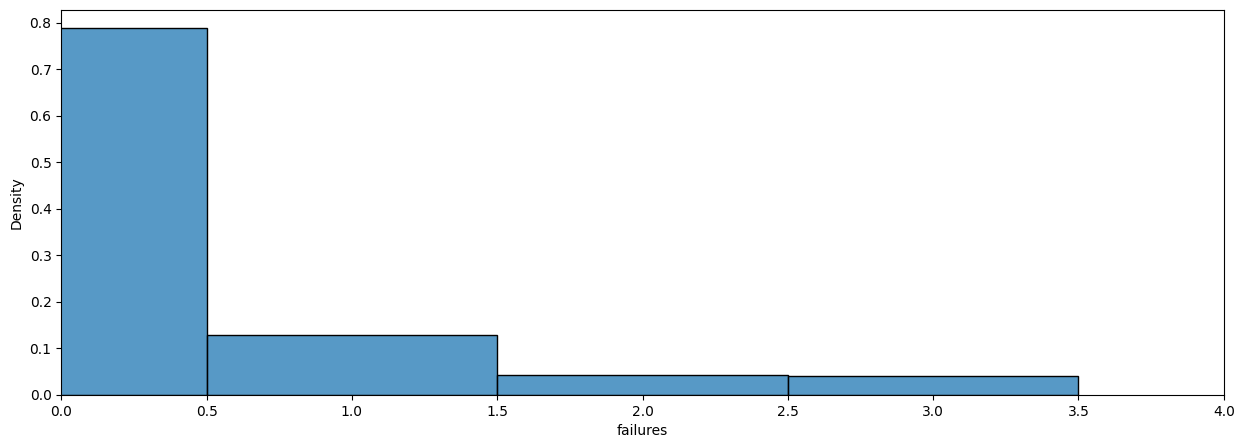

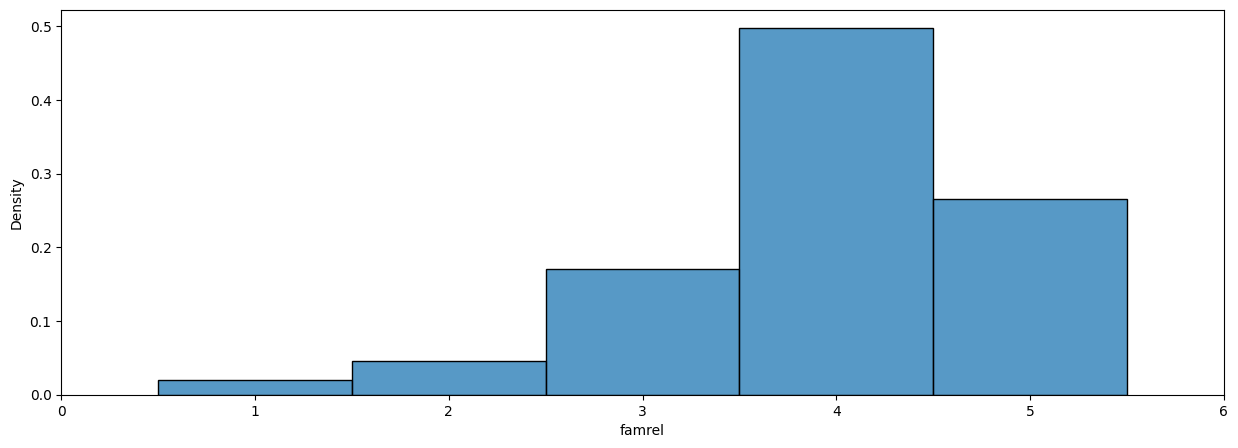

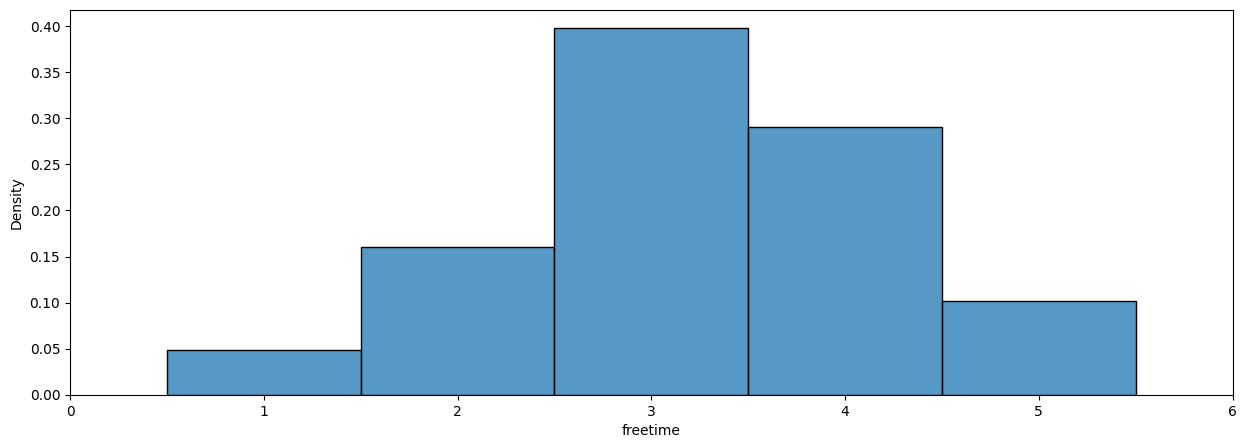

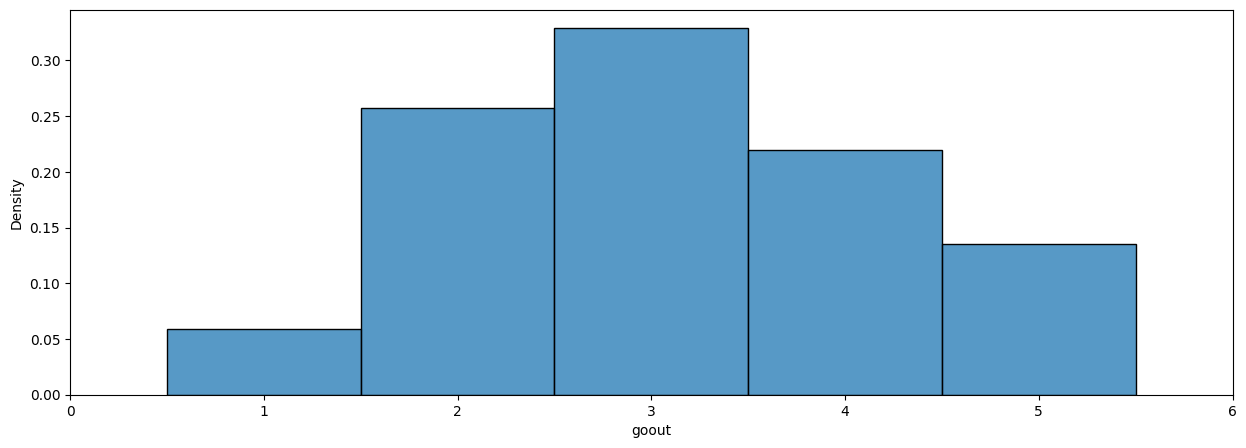

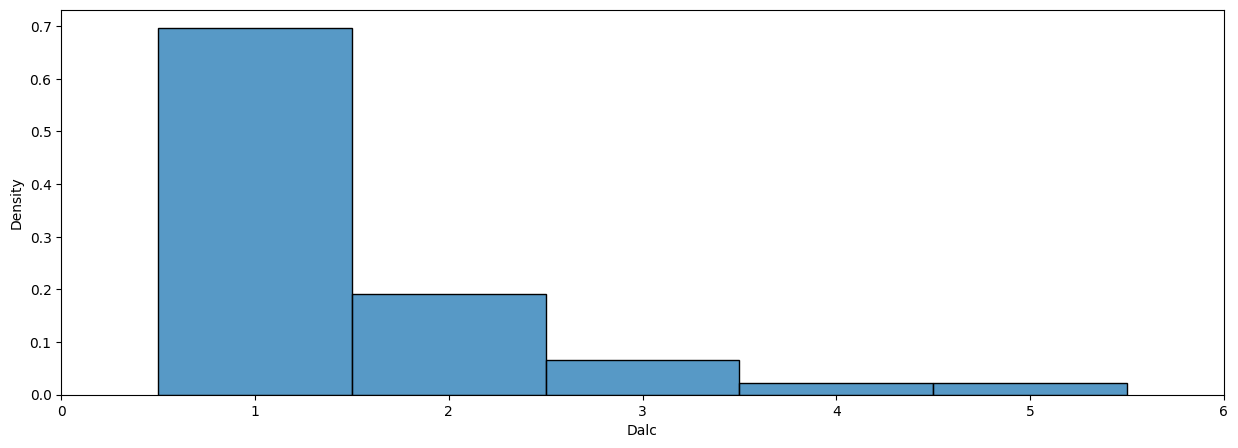

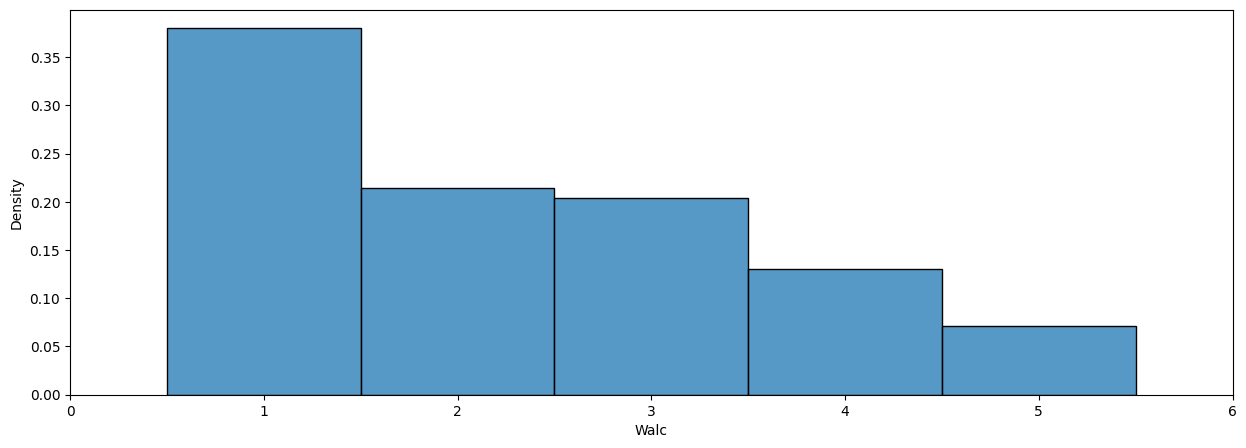

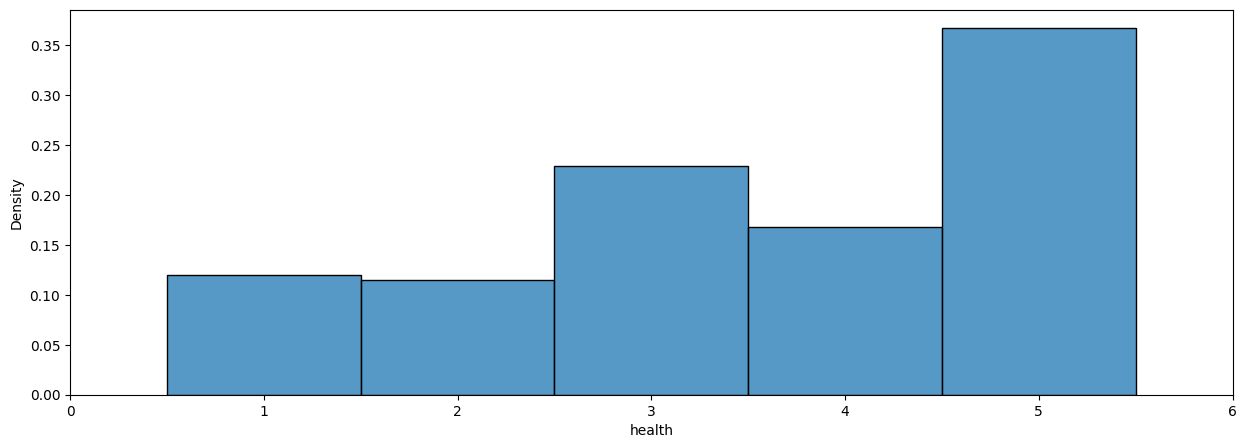

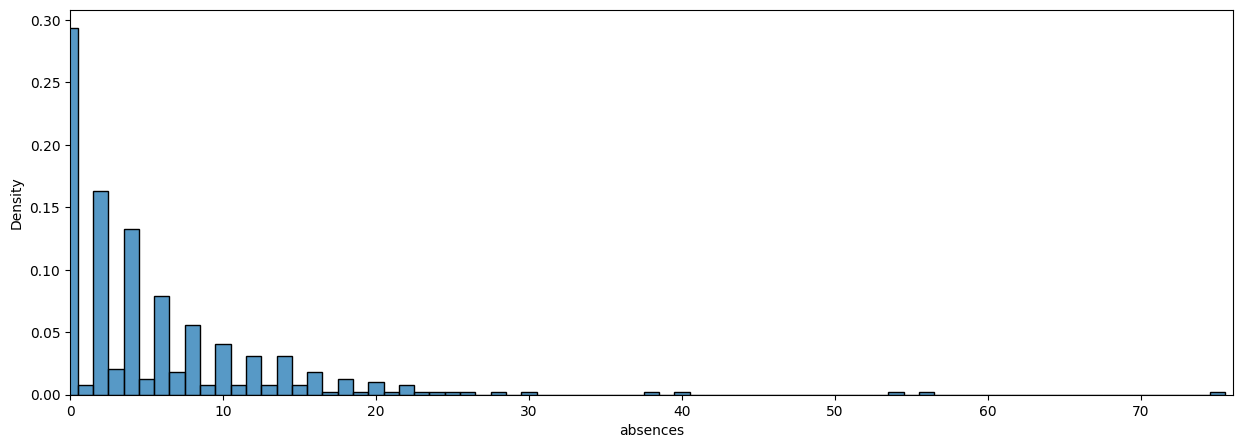

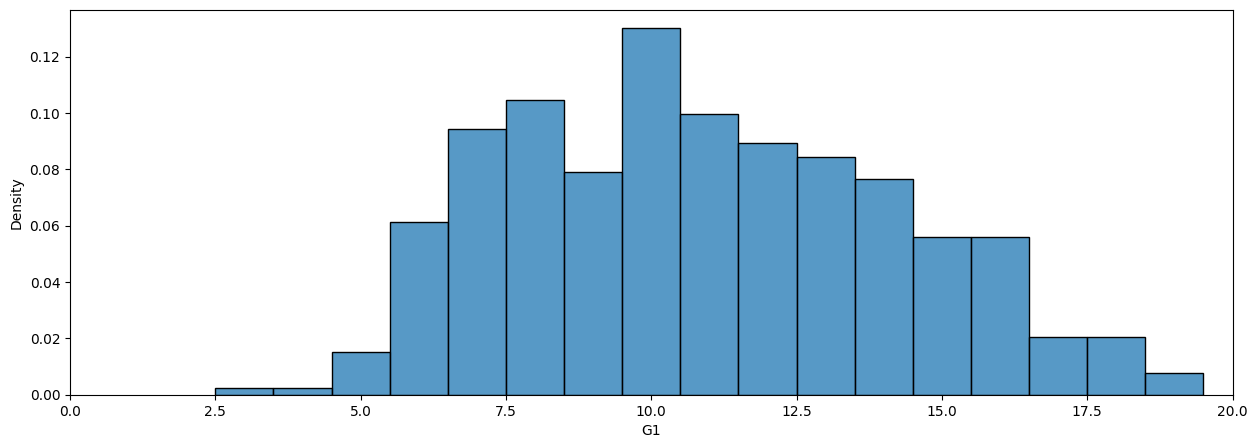

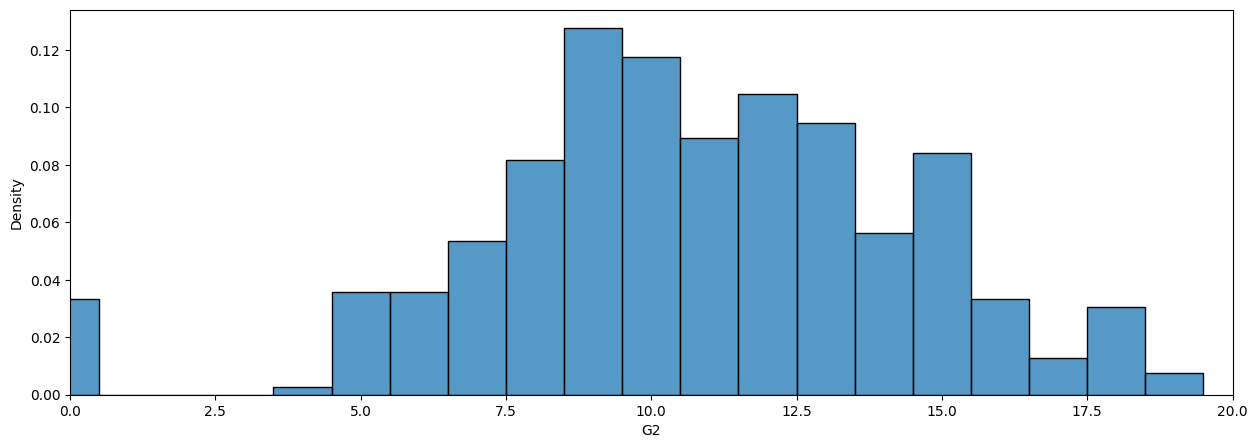

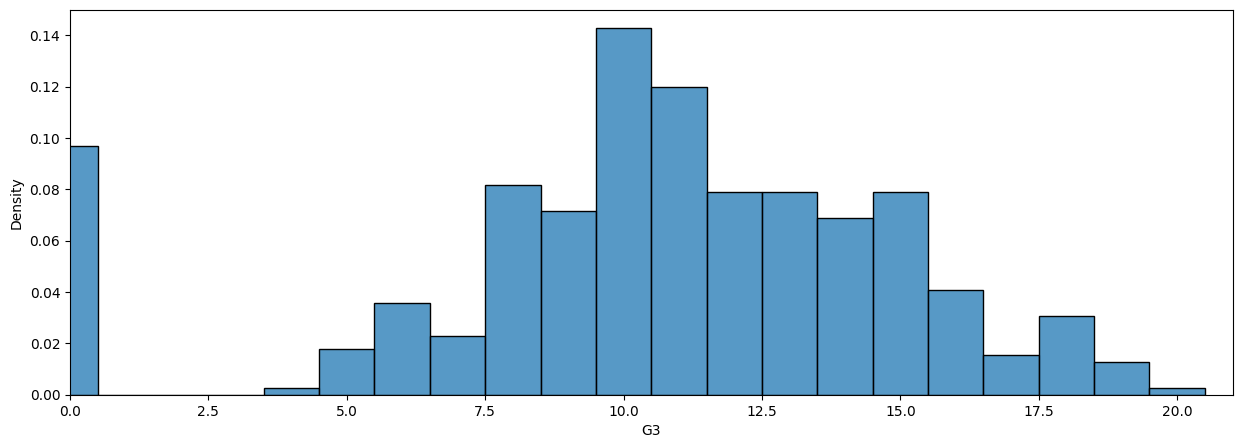

In [ ]:
for col in num_columns:
  d = sns.histplot(data=data[col], bins=4,discrete=True, stat='density')
  d.set(xlim=(0, data[col].max() + 1))
  plt.show()

school 



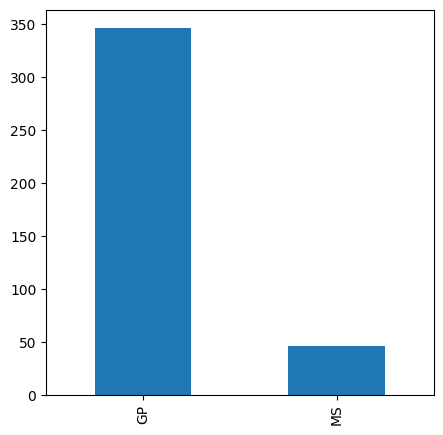


sex 



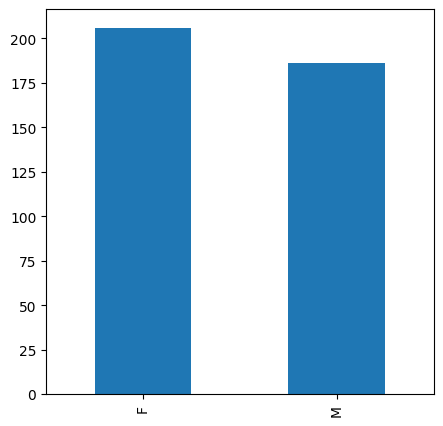


famsize 



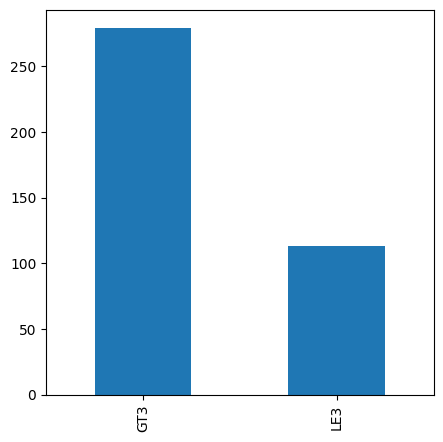


Pstatus 



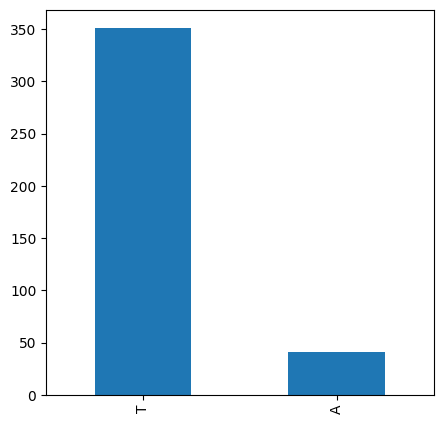


schoolsup 



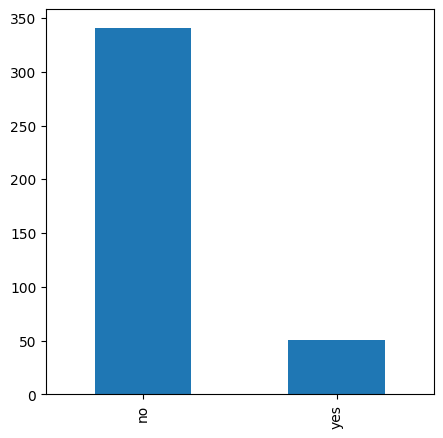


famsup 



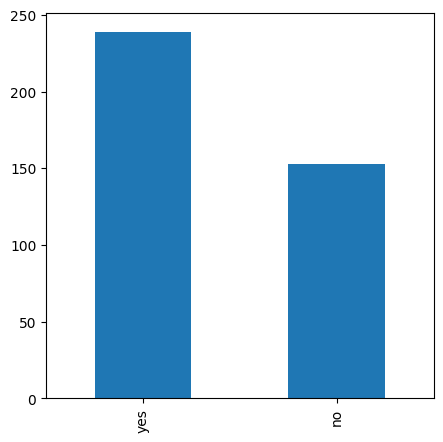


paid 



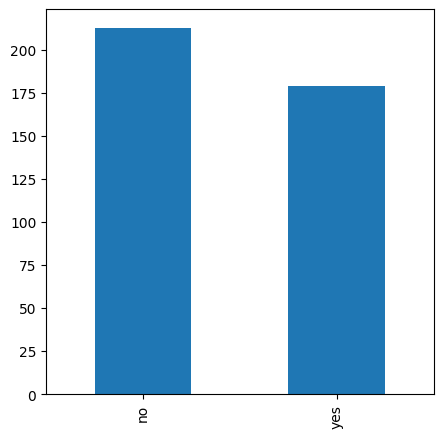


activities 



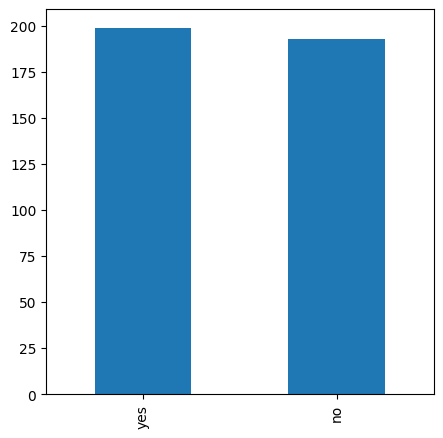


nursery 



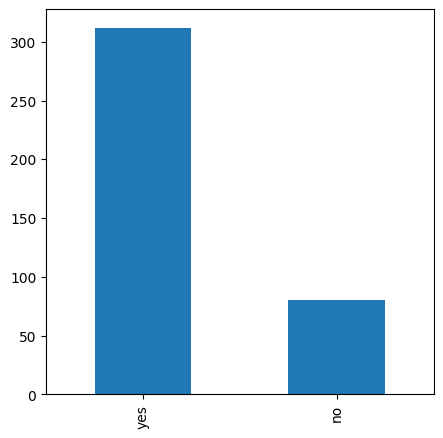


higher 



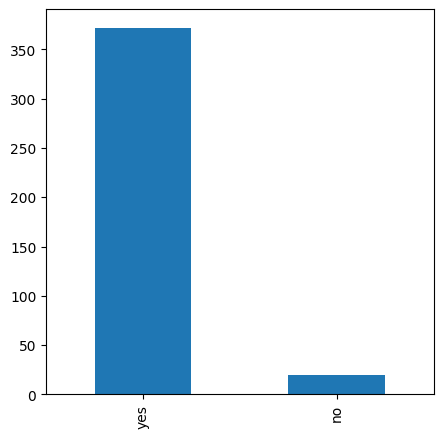


internet 



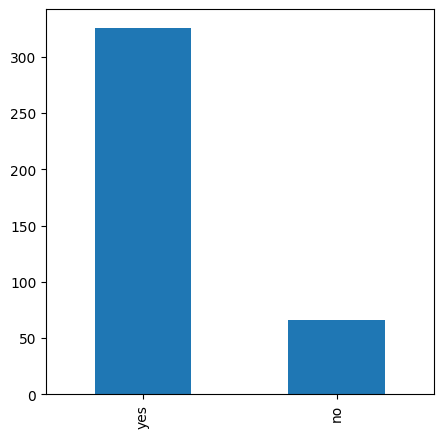


location 



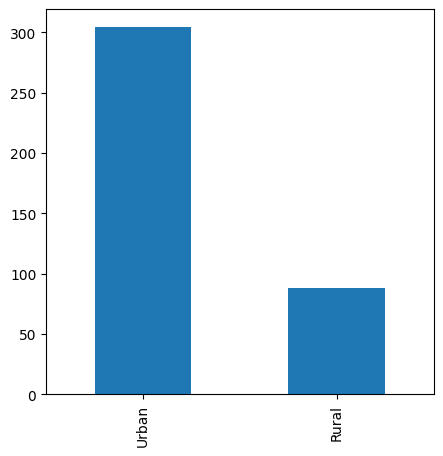


study_time 



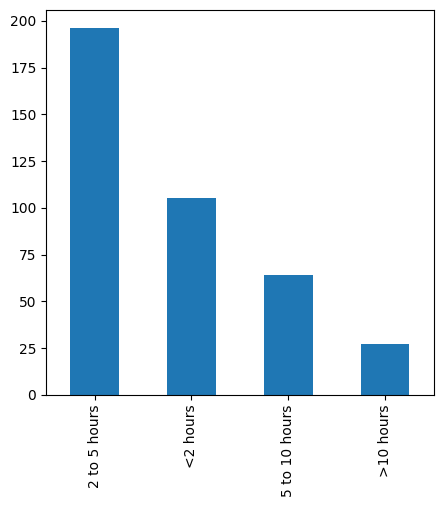

In [ ]:
for col in cat_columns:
  print('{}'.format(col), '\n')
  ax = data[col].value_counts().plot(kind="bar", figsize=(5,5))
  plt.show()
  print()

In [ ]:
from sklearn.preprocessing import LabelEncoder
dataframe = data.copy(deep=True).drop(columns=['Unnamed: 0'])

labelencoder=LabelEncoder()
for column in cat_columns + [SEARCHED_NAME] :
    dataframe[column] = labelencoder.fit_transform(dataframe[column])
# sns.pairplot(dataframe)

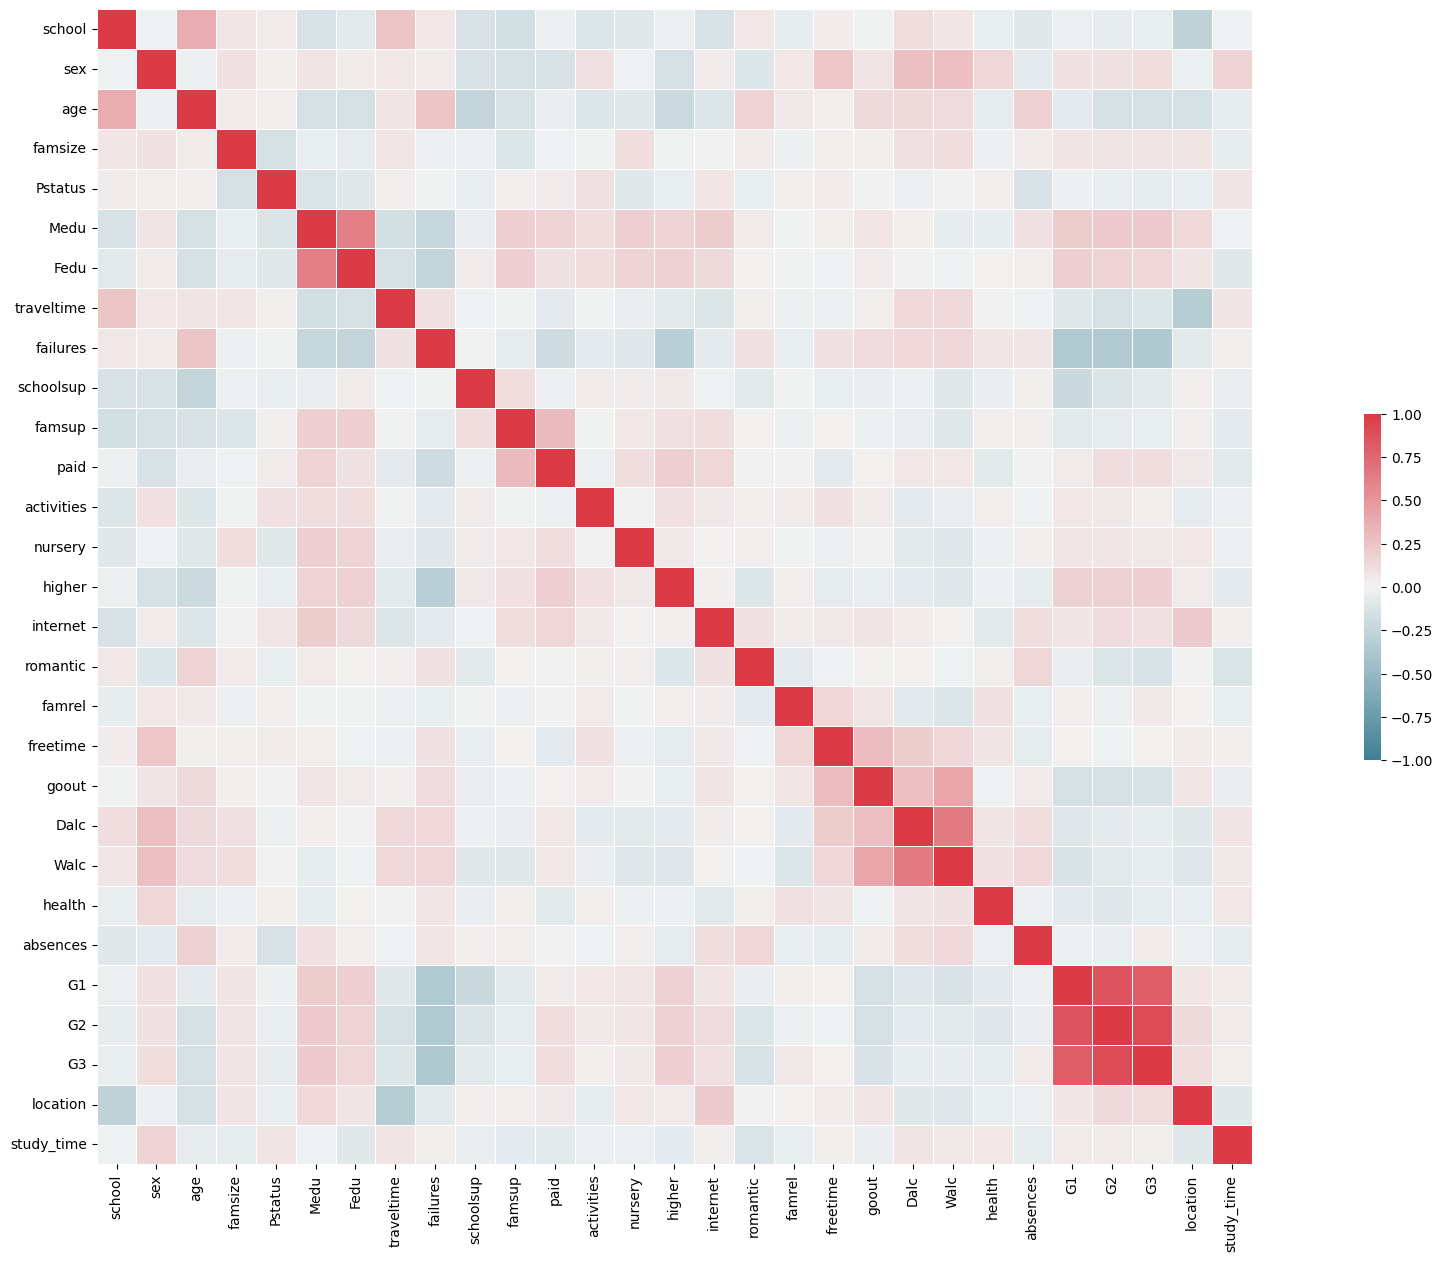

In [ ]:
corr = dataframe.corr()


f, ax = plt.subplots(figsize=(29, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, square=True,linewidths=.5, cbar_kws={"shrink": .3}, ax=ax)
plt.show()

In [ ]:
corr

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
school,1.000000,-0.012286,0.377610,0.064866,0.045923,-0.133333,-0.079807,0.242308,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017,-0.279797,-0.011336
sex,-0.012286,1.000000,-0.028606,0.089862,0.023443,0.078228,0.034878,0.059722,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456,-0.028504,0.157135
age,0.377610,-0.028606,1.000000,0.037847,0.029598,-0.163658,-0.163438,0.070641,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.146722,-0.054489
famsize,0.064866,0.089862,0.037847,1.000000,-0.149612,-0.043068,-0.058879,0.063493,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407,0.072472,-0.048122
Pstatus,0.045923,0.023443,0.029598,-0.149612,1.000000,-0.123565,-0.088730,0.028265,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009,-0.042572,0.073189
Medu,-0.133333,0.078228,-0.163658,-0.043068,-0.123565,1.000000,0.623455,-0.171639,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.138804,-0.008609
Fedu,-0.079807,0.034878,-0.163438,-0.058879,-0.088730,0.623455,1.000000,-0.158194,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.072178,-0.093291
traveltime,0.242308,0.059722,0.070641,0.063493,0.028265,-0.171639,-0.158194,1.000000,0.092239,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.328096,0.076874
failures,0.059804,0.044436,0.243665,-0.015769,-0.003339,-0.236680,-0.250408,0.092239,1.000000,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.078578,0.030327
schoolsup,-0.139789,-0.138271,-0.251811,-0.028642,-0.042238,-0.036029,0.037530,-0.009246,-0.000437,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716,-0.001345,-0.045465,-0.037698,-0.021485,-0.087152,-0.034124,0.022526,-0.212607,-0.117385,-0.082788,0.024712,-0.036918


In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ('standardscaler', StandardScaler()),
    ])


cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
        ("standardscaler", StandardScaler())
    ])

from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, num_columns),
        ("cat_pipeline", cat_pipeline, cat_columns),
        ],
        remainder="drop",
    )

In [ ]:
TEST_SIZE = 0.25
N_SPLITS = 4

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[SEARCHED_NAME] = le.fit_transform(data[SEARCHED_NAME])
X = data.loc[:, (data.columns != SEARCHED_NAME) & (data.columns !=  'Unnamed: 0')]
y = data[SEARCHED_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

kfold = StratifiedKFold(n_splits=N_SPLITS)

(296, 28) (296,)
(99, 28) (99,)


## **LOGISTIC REGRESSION**

In [ ]:
pipe_1 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression(n_jobs=-1))
    ])

classifier__C = [ 10**i for i in range(-3,3)]
classifier__l1_ratio = [i/100 for i in range(1,8)]

param_grid_1 = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
    'classifier__C': classifier__C,
    'classifier__l1_ratio': classifier__l1_ratio
}

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)

{'classifier__C': 0.01, 'classifier__l1_ratio': 0.01, 'classifier__penalty': 'l2'}
0.6587837837837839


### TEST_SIZE = 0.2, N_SPLITS = 6 : 0.6614658925979681
### TEST_SIZE = 0.25, N_SPLITS = 4 : 0.6587837837837839


# **LINEAR SVC**

In [ ]:
pipe_2 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LinearSVC())
    ])

classifier__C = [ 10**i for i in range(-4,4)]

param_grid_2 = {
    'classifier__penalty': ['l1', 'l2', None],
    'classifier__C': classifier__C,
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}
0.6486486486486486


### TEST_SIZE = 0.2, N_SPLITS = 6 : 0.6455611998064827
### TEST_SIZE = 0.25, N_SPLITS = 4 : 0.6486486486486486

# **SVM POLY**

In [ ]:
pipe_3 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='poly', max_iter = 50000))
    ])

classifier__C = [ 10**i for i in range(-6,-2)]
classifier__coef0 = [ 10**i for i in range(-1,2)]
classifier__degree = [i for i in range(2, 7)]

param_grid_3 = {
    'classifier__C': classifier__C,
    'classifier__coef0': classifier__coef0,
    'classifier__degree': classifier__degree
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print(grid_3.best_score_)

{'classifier__C': 0.001, 'classifier__coef0': 10, 'classifier__degree': 4}
0.6824324324324323


### TEST_SIZE = 0.25, N_SPLITS = 4 : 0.6824324324324323

# **SVM RBF**

In [ ]:
pipe_4 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf'))
    ])


classifier__C = [ 10**i for i in range(-1,2)]
classifier__coef0 = [ 10**i for i in range(-6,-2)]
classifier__degree = [i for i in range(0, 10)]

param_grid_4 = {
    'classifier__C': classifier__C,
    'classifier__coef0': classifier__coef0,
    'classifier__degree': classifier__degree
}

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
print(grid_4.best_score_)

{'classifier__C': 1, 'classifier__coef0': 1e-06, 'classifier__degree': 0}
0.6587837837837839


### TEST_SIZE = 0.25, N_SPLITS = 4 : 0.6587837837837839

# **KNeighborsClassifier**

In [ ]:
pipe_5 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KNeighborsClassifier(n_jobs=-1))
    ])
classifier__metric = ['euclidean', 'manhattan','chebyshev','minkowski','hamming','mahalanobis','cosine']
classifier__n_neighbors = [10*i for i in range(2,8)]
param_grid_5 = {
    'classifier__metric': classifier__metric,
    'classifier__n_neighbors': classifier__n_neighbors
}

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
print(grid_5.best_score_)

{'classifier__metric': 'chebyshev', 'classifier__n_neighbors': 20}
0.6722972972972974


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6582002902757619
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6722972972972974

# **DecisionTreeClassifier**

In [ ]:
pipe_6 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', DecisionTreeClassifier())
    ])
classifier__max_depth = [2**i for i in range(0,8)]
classifier__max_leaf_nodes = [None]+[ 2**i for i in range(0,8)]

param_grid_6 = {
            'classifier__max_depth': classifier__max_depth,
            'classifier__max_leaf_nodes': classifier__max_leaf_nodes,
}

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
print(grid_6.best_score_)

{'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 8}
0.668918918918919


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6707789066279632
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6722972972972974

# Random forest


In [ ]:
pipe_7 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier(n_jobs=-1))
    ])
classifier__n_estimators = [2**i for i in range(0,7)]
classifier__max_leaf_nodes = [2**i for i in range(0,8)]
param_grid_7 = {
            'classifier__n_estimators' : classifier__n_estimators,
            'classifier__max_leaf_nodes' : classifier__max_leaf_nodes,
}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
print(grid_7.best_score_)

{'classifier__max_leaf_nodes': 16, 'classifier__n_estimators': 32}
0.6790540540540542


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6741049830672473
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6858108108108107

# **BaggingClassifier**

In [ ]:
pipe_8 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', BaggingClassifier())
    ])

classifier__max_samples = [0.01,0.05, 0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]

param_grid_8 = {
            'classifier__max_samples' : classifier__max_samples
}

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
print(grid_8.best_params_)
print(grid_8.best_score_)

{'classifier__max_samples': 0.8}
0.6925675675675675


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6518505079825835
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6621621621621622

# **AdaBoostClassifier**

In [ ]:
pipe_9 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', AdaBoostClassifier())
    ])

classifier__n_estimators = [2**i for i in range(2,5)]
classifier__learning_rate = [0.1, 0.2, 0.3, 0.4]
param_grid_9 = {
    'classifier__n_estimators' : classifier__n_estimators,
    'classifier__learning_rate' : classifier__learning_rate,
}

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
print(grid_9.best_params_)
print(grid_9.best_score_)


{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 4}
0.6587837837837839


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6644895984518625
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6587837837837839

# **GradientBoostingClassifier**

In [ ]:
pipe_10 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', GradientBoostingClassifier())
    ])
classifier__n_estimators = [2**i for i in range(1,5)]
classifier__learning_rate = [0.01,0.1, 0.2]
param_grid_10 = {
    'classifier__n_estimators' : classifier__n_estimators,
    'classifier__learning_rate' : classifier__learning_rate,
}

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
print(grid_10.best_params_)
print(grid_10.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 8}
0.6722972972972974


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6865626511852927
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6722972972972974



# **XGBClassifier**

In [ ]:
pipe_11 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', xgboost.XGBClassifier())
    ])

classifier__n_estimators = [2**i for i in range(2,11)]
classifier__learning_rate = [0.000001,0.00001,0.0001, 0.001,0.01,0.1,1]

param_grid_11 = {
    'classifier__n_estimators' : classifier__n_estimators,
    'classifier__learning_rate' : classifier__learning_rate,
}

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True)

y_train1 = le.fit_transform(y_train)

grid_11.fit(X_train, y_train1)
print(grid_11.best_params_)
print(grid_11.best_score_)

{'classifier__learning_rate': 1e-06, 'classifier__n_estimators': 512}
0.6722972972972973


### TEST_SIZE = 0.2, N_SPLITS = 6: 0.6741049830672471
### TEST_SIZE = 0.25, N_SPLITS = 4: 0.6722972972972973

# Neutral network

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
!pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier

deep_models = []

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(X_train)
print(y_train)

    school sex  age famsize Pstatus  Medu  Fedu  traveltime  failures schoolsup famsup paid activities nursery higher internet  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3 location     study_time
81      GP   M   15     GT3       T     2     3           1         0       yes     no  yes         no      no    yes      yes       5         3      2     1     2       5         4  11  10  11    Urban  5 to 10 hours
344     GP   F   18     GT3       T     2     3           1         0        no    yes   no         no     yes    yes      yes       4         3      3     1     2       3         4  11  10  10    Urban  5 to 10 hours
336     GP   F   19     GT3       A     3     1           1         1        no     no  yes         no     yes    yes       no       5         4      3     1     2       5        12  14  13  13    Rural  5 to 10 hours
124     GP   F   16     GT3       T     2     2           1         0        no     no  yes         no     yes    yes      yes  

# Simple Neuron Network

In [ ]:
from keras.callbacks import Callback
from keras.layers import BatchNormalization

keras.backend.clear_session()

simple_neuron_network = Sequential()
simple_neuron_network.add(Dense(100, activation="relu", input_shape=(43,)))
simple_neuron_network.add(Dense(50, activation="relu", use_bias=False))
simple_neuron_network.add(Dense(10, activation="relu", use_bias=False))
simple_neuron_network.add(Dense(1, activation="sigmoid"))
simple_neuron_network.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=simple_neuron_network, epochs=100, batch_size=32, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)]))
])

pipeline.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 2s 59ms/step - loss: 0.7130 - accuracy: 0.4925 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6578 - accuracy: 0.6504 - val_loss: 0.6539 - val_accuracy: 0.6667
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6368 - accuracy: 0.6541 - val_loss: 0.6353 - val_accuracy: 0.7333
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6198 - accuracy: 0.6541 - val_loss: 0.6312 - val_accuracy: 0.7333
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5991 - accuracy: 0.6617 - val_loss: 0.6357 - val_accuracy: 0.6667
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.5806 - accuracy: 0.6955 - val_loss: 0.6404 - val_accuracy: 0.6333
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5604 - accuracy: 0.7068 - val_loss: 0.6241 - val_accuracy: 0.6333
Epoch 8/100
9/9 [=====

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'G3']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   Sim...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['school', 'sex', 'famsize',
                                                   'Pstatus', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'location',
                                                   'study_time'])])),
                ('classifier',
                 KerasClassifier(batch_size=32, callbacks=[<keras.callbacks.EarlyStopping object at 0x7fcb2f5d2b60>], epochs=100, model=<keras.engine.sequential.Sequential object at 0x7fcb2fb0b250>))])

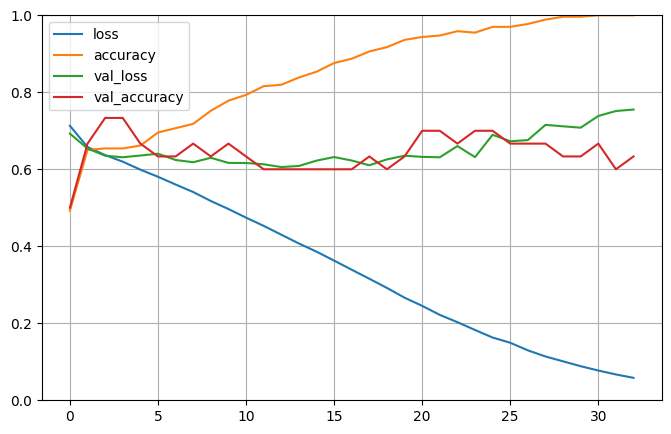

In [ ]:
history = pipeline['classifier'].model.history.history
pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

deep_models.append(("Simple neuron network", simple_neuron_network))

# Advanced Neuron Network

In [ ]:
from keras.callbacks import Callback
from keras.layers import BatchNormalization, Dropout, Activation

keras.backend.clear_session()

advenced_neuron_network = Sequential()
advenced_neuron_network.add(Dense(100, use_bias=False, input_shape=(43,)))
advenced_neuron_network.add(BatchNormalization())
advenced_neuron_network.add(Activation("relu"))
advenced_neuron_network.add(Dropout(0.25))
advenced_neuron_network.add(Dense(50, use_bias=False))
advenced_neuron_network.add(BatchNormalization())
advenced_neuron_network.add(Activation("relu"))
advenced_neuron_network.add(Dropout(0.25))
advenced_neuron_network.add(Dense(30, use_bias=False))
advenced_neuron_network.add(BatchNormalization())
advenced_neuron_network.add(Activation("relu"))
advenced_neuron_network.add(Dropout(0.25))
advenced_neuron_network.add(Dense(10, use_bias=False))
advenced_neuron_network.add(BatchNormalization())
advenced_neuron_network.add(Activation("relu"))
advenced_neuron_network.add(Dropout(0.25))
advenced_neuron_network.add(Dense(1, activation="sigmoid"))
advenced_neuron_network.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=advenced_neuron_network, epochs=1000, batch_size=32, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)]))
])

pipeline.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/1000
9/9 [==============================] - 5s 53ms/step - loss: 1.0144 - accuracy: 0.4173 - val_loss: 0.8376 - val_accuracy: 0.3000
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.9907 - accuracy: 0.4474 - val_loss: 0.7985 - val_accuracy: 0.3333
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.8880 - accuracy: 0.4812 - val_loss: 0.7621 - val_accuracy: 0.4000
Epoch 4/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.9132 - accuracy: 0.4662 - val_loss: 0.7375 - val_accuracy: 0.4000
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.8599 - accuracy: 0.4436 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.8344 - accuracy: 0.4774 - val_loss: 0.6848 - val_accuracy: 0.6000
Epoch 7/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7841 - accuracy: 0.5338 - val_loss: 0.6658 - val_accuracy: 0.6000
Epoch 8/1000
9/9

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'G3']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   Sim...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['school', 'sex', 'famsize',
                                                   'Pstatus', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'location',
                                                   'study_time'])])),
                ('classifier',
                 KerasClassifier(batch_size=32, callbacks=[<keras.callbacks.EarlyStopping object at 0x7fcb93e3b1c0>], epochs=1000, model=<keras.engine.sequential.Sequential object at 0x7fcb2f5839a0>))])

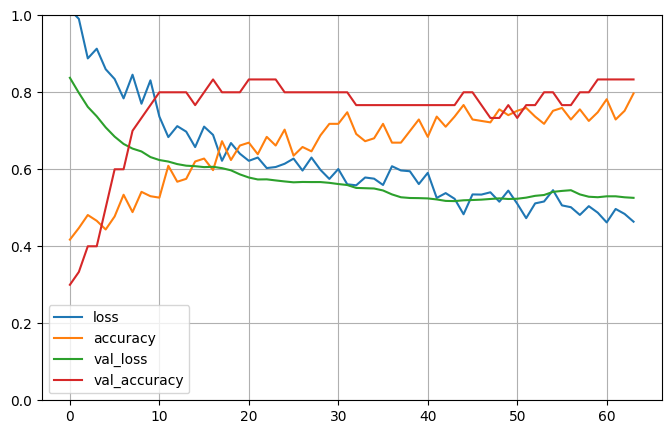

In [ ]:
history_2 = pipeline['classifier'].model.history.history
pd.DataFrame(history_2).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

deep_models.append(("Advanced Neuron Network", model_2))

In [ ]:
def get_recall_score(deep_model, X_test_scaled, y_test):
    recall_keras = keras.metrics.Recall()
    recall_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return recall_keras.result().numpy()

def get_precision_score(deep_model, X_test_scaled, y_test):
    precision_keras = keras.metrics.Precision()
    precision_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return precision_keras.result().numpy()

def get_accuracy_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.Accuracy()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

def get_f1_score(deep_model, X_test_scaled, y_test):
    pres = get_precision_score(deep_model, X_test_scaled, y_test)
    rec = get_recall_score(deep_model, X_test_scaled, y_test)
    return (2 * pres * rec) / (pres + rec)

def get_roc_auc_score(deep_model, X_test_scaled, y_test):
    accuracy_keras = keras.metrics.AUC()
    accuracy_keras.update_state(y_true=y_test, y_pred=(deep_model.predict(X_test_scaled) > 0.5).astype("int32"))
    return accuracy_keras.result().numpy()

In [ ]:
from sklearn import metrics

models = []
models.append(('Logistic regression', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('SVM rbf', grid_4.best_estimator_))
models.append(('KNeighborsClassifier', grid_5.best_estimator_))
models.append(('DecisionTreeClassifier', grid_6.best_estimator_))
models.append(('RandomForestClassifier', grid_7.best_estimator_))
models.append(('BaggingClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
models.append(('XGBClassifier', grid_11.best_estimator_))

X_train_results= preprocess_pipeline.fit_transform(X_train)
X_test_scaled = preprocess_pipeline.transform(X_test)

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append(metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

for name, model in deep_models:
    precision_score.append(get_precision_score(model, X_test_scaled, y_test))
    recall_score.append(get_recall_score(model, X_test_scaled, y_test))
    f1_score.append(get_f1_score(model, X_test_scaled, y_test))
    accuracy_score.append(get_accuracy_score(model, X_test_scaled, y_test))
    roc_auc_score.append(get_roc_auc_score(model, X_test_scaled, y_test))

d = {
    'precision_score': precision_score,
    'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
    'roc_auc_score': roc_auc_score
     }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Name', value=[
    'Logistic regression', 'SVM linear', 'SVM poly', 'SVM rbf', 'KNeighbors', 'DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 'GradientBoosting', 'XGB', 'Neural Network 1', 'Neural Network 2'
    ])
df

4/4 [==============================] - 0s 5ms/step


,Name,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,Logistic regression,0.666667,0.064516,0.117647,0.696970,0.524905
1,SVM linear,0.619048,0.419355,0.500000,0.737374,0.650854
2,SVM poly,0.636364,0.225806,0.333333,0.717172,0.583491
3,SVM rbf,0.000000,0.000000,0.000000,0.666667,0.485294
4,KNeighbors,0.333333,0.032258,0.058824,0.676768,0.501423
5,DecisionTree,0.333333,0.161290,0.217391,0.636364,0.507116
6,RandomForest,0.750000,0.096774,0.171429,0.707071,0.541034
7,Bagging,0.571429,0.258065,0.355556,0.707071,0.584915
8,AdaBoost,0.411765,0.225806,0.291667,0.656566,0.539374
9,GradientBoosting,0.454545,0.161290,0.238095,0.676768,0.536528


<Axes: title={'center': 'Precision scores'}, xlabel='Name', ylabel='precision_score'>

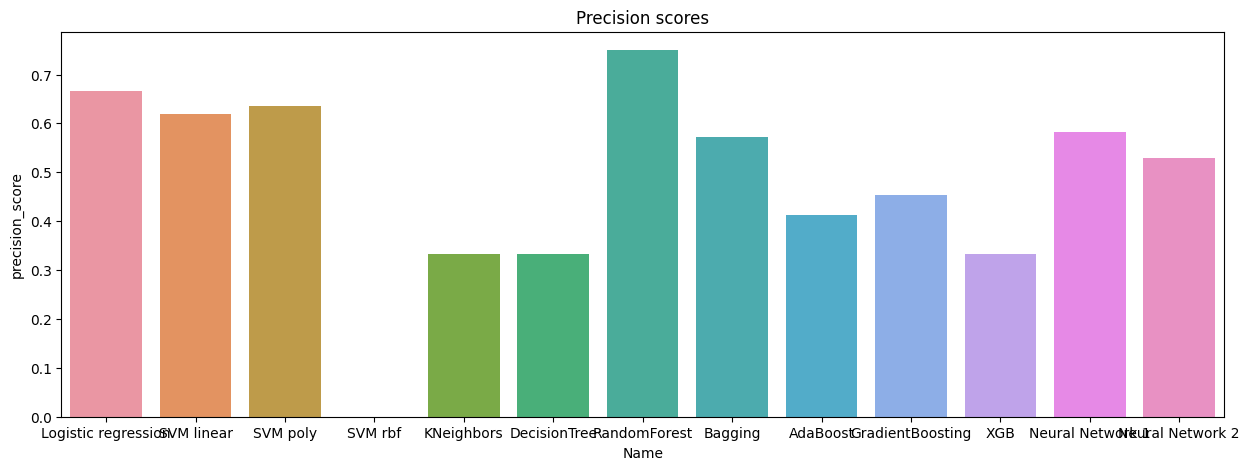

In [ ]:
plt.title('Precision scores')
sns.barplot(data=df, y='precision_score', x='Name')

<Axes: title={'center': 'Recall scores'}, xlabel='Name', ylabel='recall_score'>

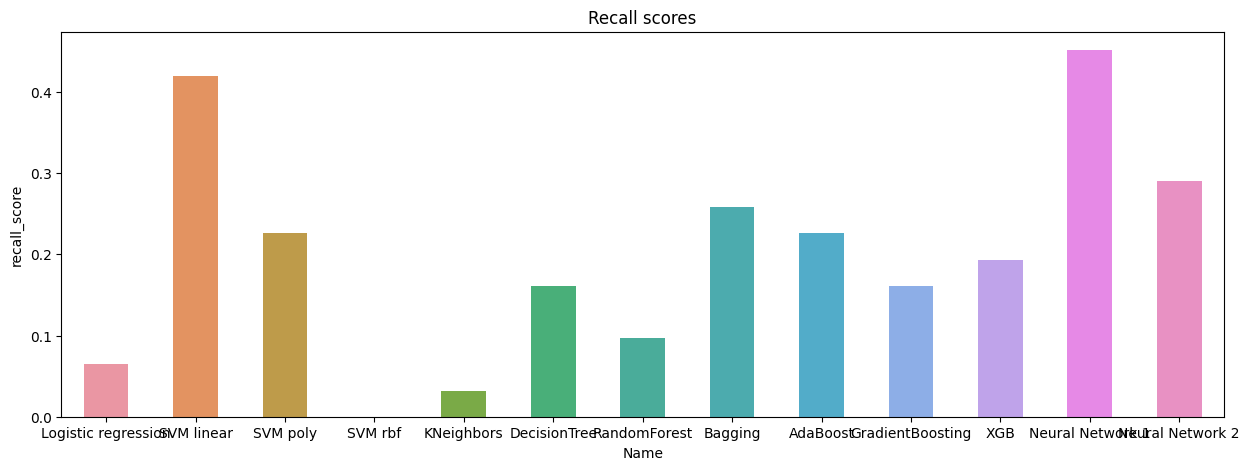

In [ ]:
plt.title('Recall scores')
sns.barplot(data=df, y='recall_score', x='Name', width=0.5)

<Axes: title={'center': 'F1 scores'}, xlabel='Name', ylabel='f1_score'>

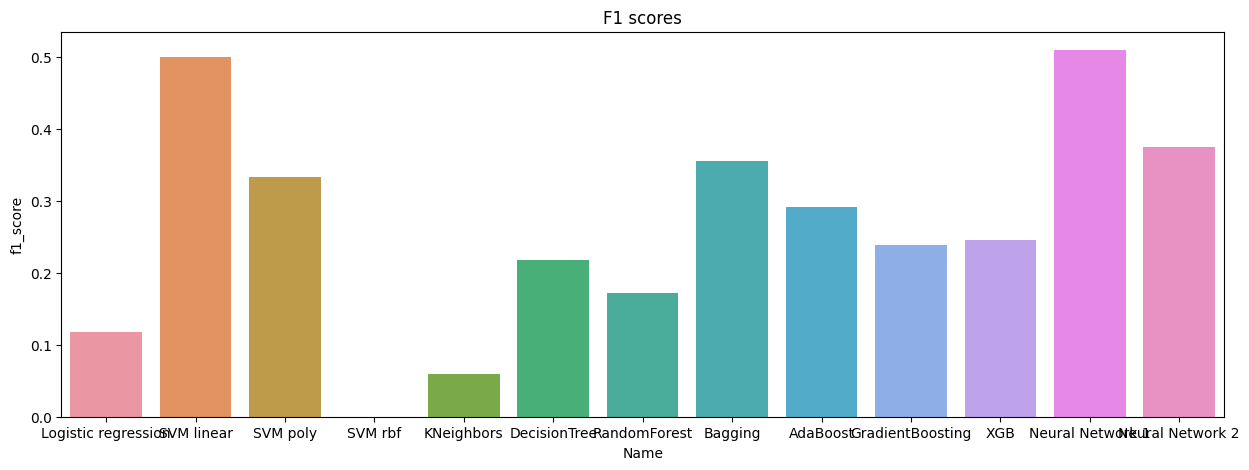

In [ ]:

plt.title('F1 scores')
sns.barplot(data=df, y='f1_score', x='Name')

<Axes: title={'center': 'Accuracy scores'}, xlabel='Name', ylabel='accuracy_score'>

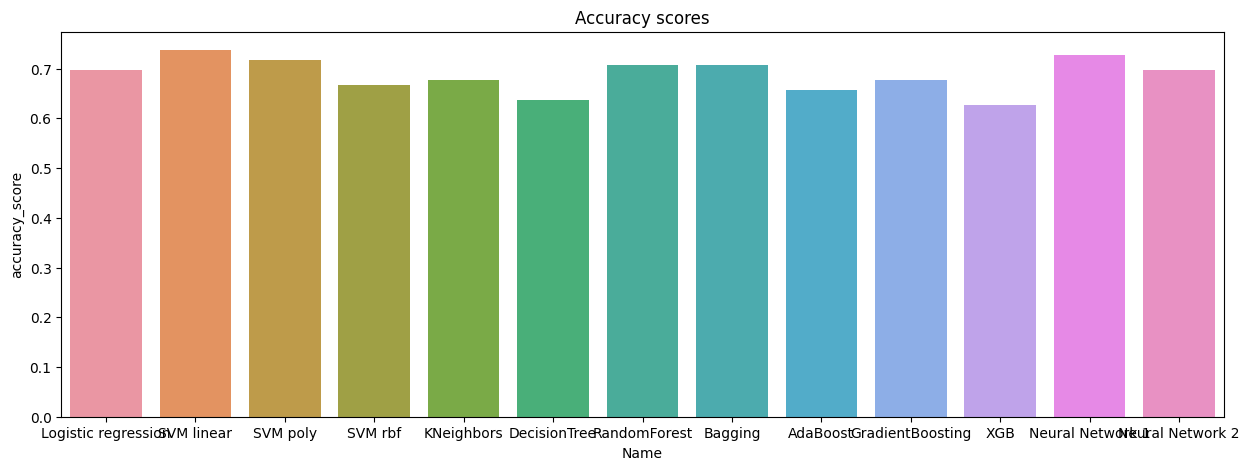

In [ ]:
plt.title('Accuracy scores')
sns.barplot(data=df, y='accuracy_score', x='Name')

<Axes: title={'center': 'Roc auc scores'}, xlabel='Name', ylabel='roc_auc_score'>

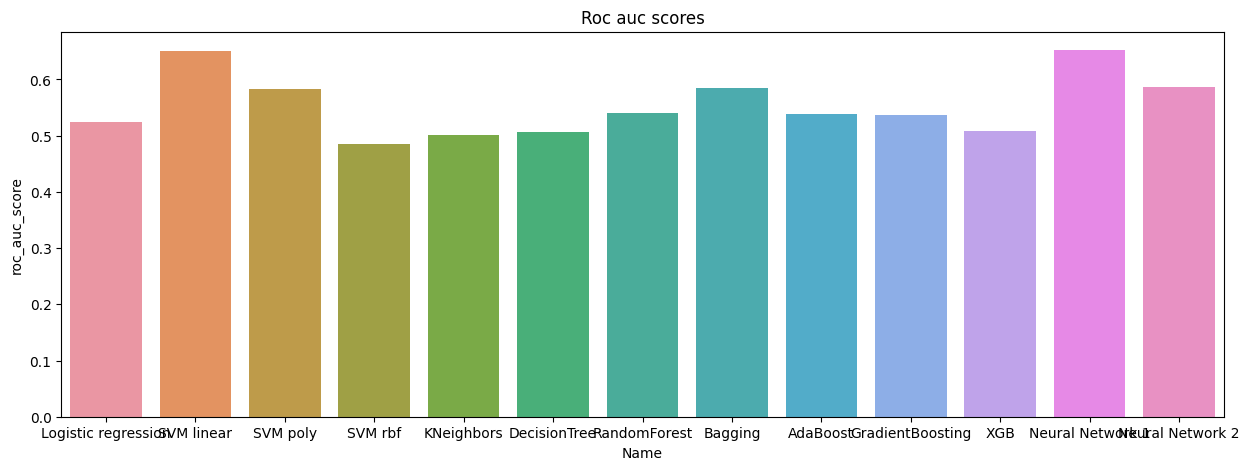

In [ ]:
plt.title('Roc auc scores')
sns.barplot(data=df, y='roc_auc_score', x='Name')

Logistic regression


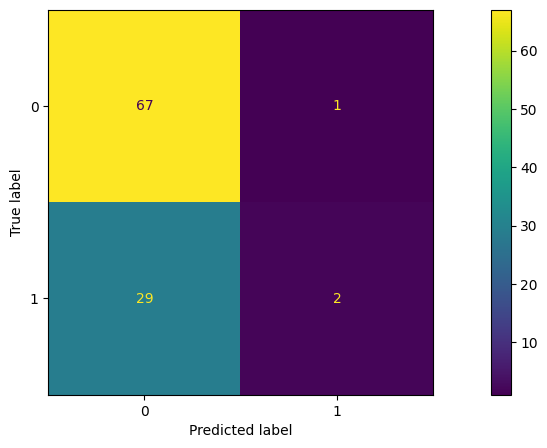






SVM linear


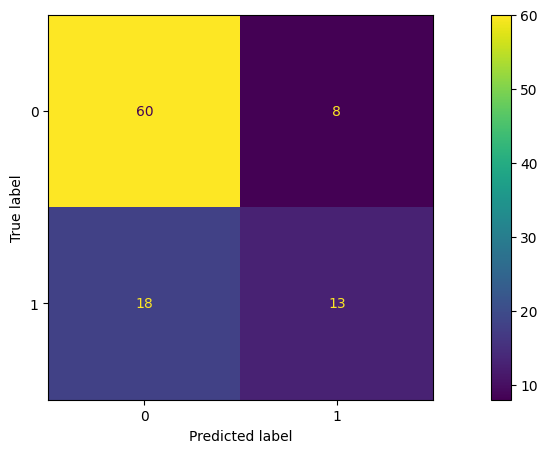






SVM poly


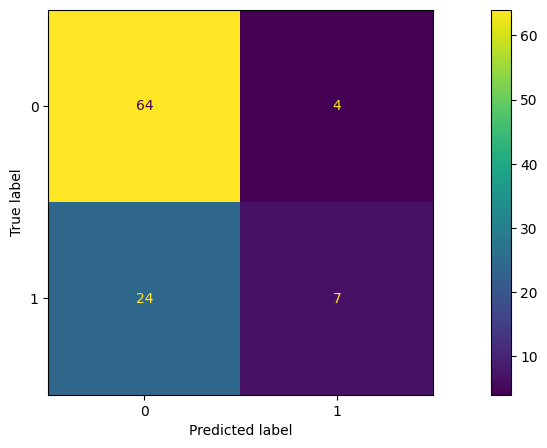






SVM rbf


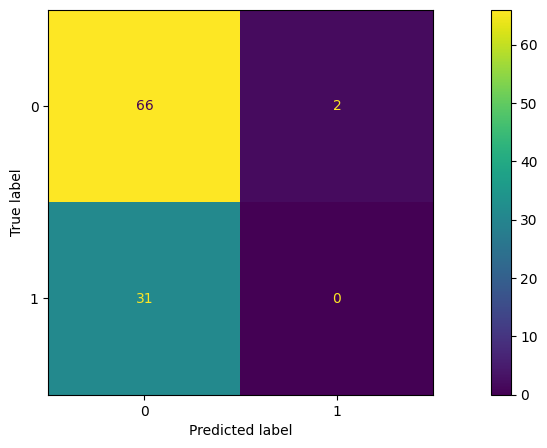






KNeighborsClassifier


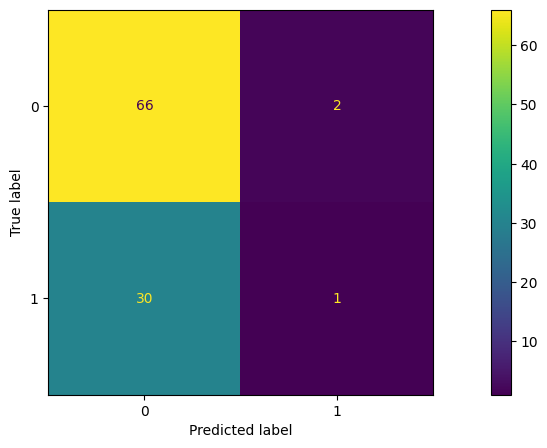






DecisionTreeClassifier


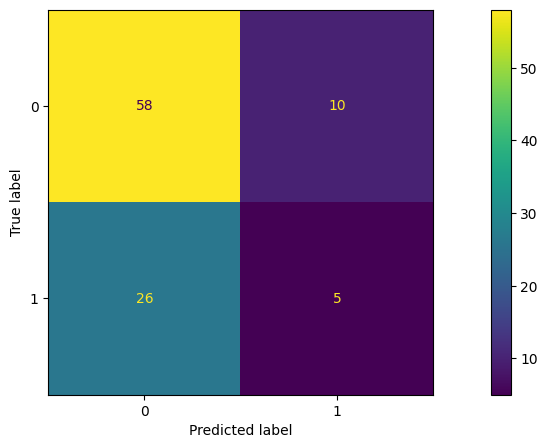






RandomForestClassifier


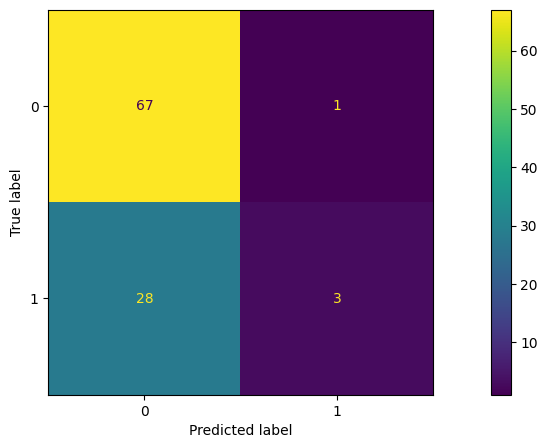






BaggingClassifier


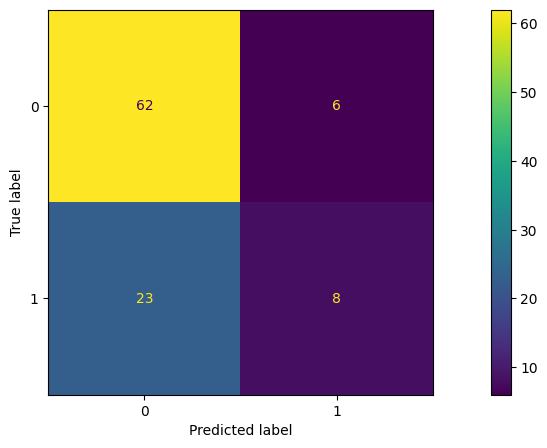






AdaBoostClassifier


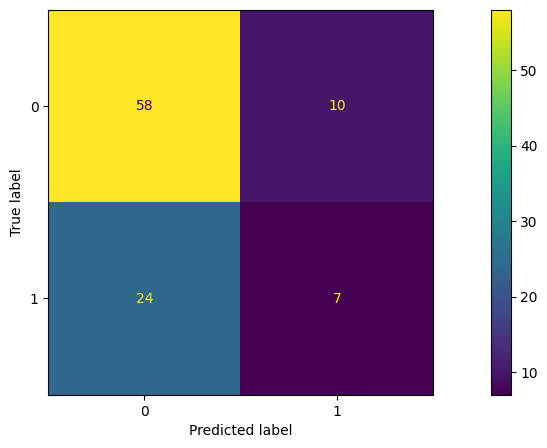






GradientBoostingClassifier


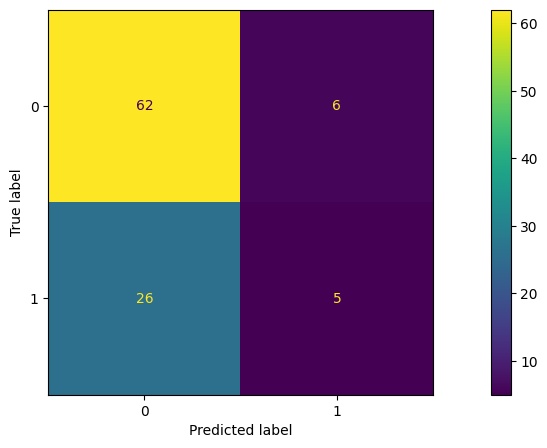






XGBClassifier


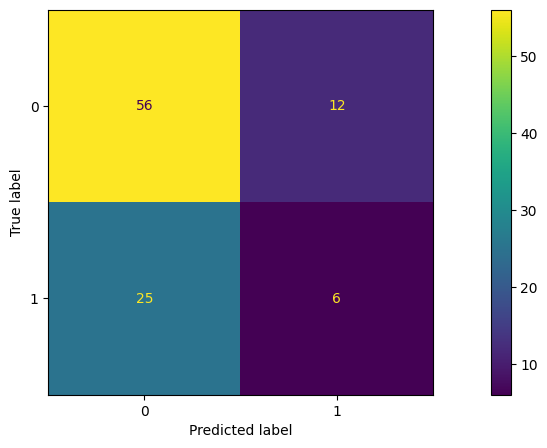






Neural Network 1
4/4 [==============================] - 0s 4ms/step


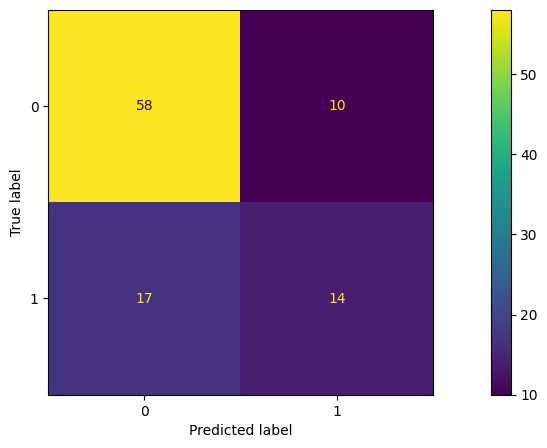






Neural Network 2
4/4 [==============================] - 0s 5ms/step


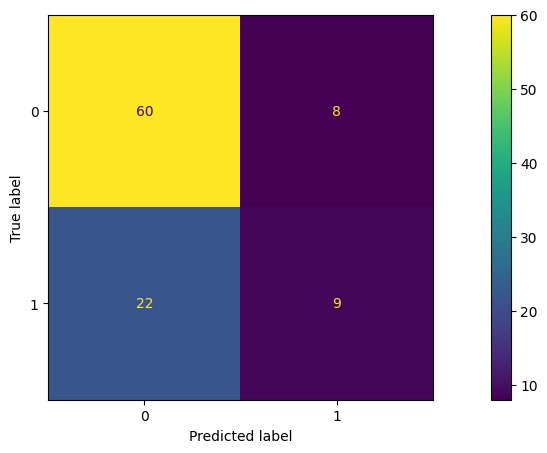

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

for name, model in models:
  print("\033[1m" + name + "\033[0m")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.show()
  print('\n\n\n\n')

for name, model in deep_models:
  print("\033[1m" + name + "\033[0m")
  y_pred= (model.predict(X_test_scaled) > 0.5).astype("int32")
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap="viridis")
  plt.show()
  print('\n\n\n\n')